# -----------------------------------------------------
# Task 3: Cross-Country Comparison
# Notebook: compare_countries.ipynb
# Branch: compare-countries
# -----------------------------------------------------

# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Inline plotting (for Jupyter)

In [2]:
%matplotlib inline

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


# -----------------------------------------------------
# Step 2: Load Cleaned Datasets
# -----------------------------------------------------

In [4]:
data_files = {
    "Benin": "../notebooks/data/benin_clean.csv",
    "Sierra Leone": "../notebooks/data/sierraleone_clean.csv",
    "Togo": "../notebooks/data/togo_clean.csv"
}

dfs = {}
for country, path in data_files.items():
    try:
        df = pd.read_csv(path, parse_dates=['Timestamp'])
        df['Country'] = country
        dfs[country] = df
        print(f"✅ Loaded {country}: {df.shape}")
    except Exception as e:
        print(f"❌ Failed to load {country}: {e}")

# Combine all datasets
combined_df = pd.concat(dfs.values(), ignore_index=True)
print(f"\n✅ Combined dataset shape: {combined_df.shape}")
display(combined_df.head())

✅ Loaded Benin: (525600, 29)
✅ Loaded Sierra Leone: (525600, 29)
✅ Loaded Togo: (525600, 29)

✅ Combined dataset shape: (1576800, 29)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,Hour,DayOfWeek,Month,GHI_lag1,DNI_lag1,DHI_lag1,GHI_roll3,Tamb_roll3,WD_bin,Country
0,2021-08-09 00:01:00,474.2,345.7,213.4,0.0,0.0,26.2,93.4,0.0,0.4,...,0,0,8,474.2,345.7,213.4,474.2,27.966667,112.5,Benin
1,2021-08-09 00:02:00,474.2,345.7,213.4,0.0,0.0,26.2,93.6,0.0,0.0,...,0,0,8,474.2,345.7,213.4,474.2,27.966667,0.0,Benin
2,2021-08-09 00:03:00,474.2,345.7,213.4,0.0,0.0,26.2,93.7,0.3,1.1,...,0,0,8,474.2,345.7,213.4,474.2,26.200000,112.5,Benin
3,2021-08-09 00:04:00,474.2,345.7,213.4,0.0,0.0,26.2,93.3,0.2,0.7,...,0,0,8,474.2,345.7,213.4,474.2,26.200000,112.5,Benin
4,2021-08-09 00:05:00,474.2,345.7,213.4,0.0,0.0,26.2,93.3,0.1,0.7,...,0,0,8,474.2,345.7,213.4,474.2,26.200000,112.5,Benin


# -----------------------------------------------------
# Step 3: Metric Comparison (Boxplots)
# -----------------------------------------------------

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24700\2920935314.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=combined_df, palette='Set2')


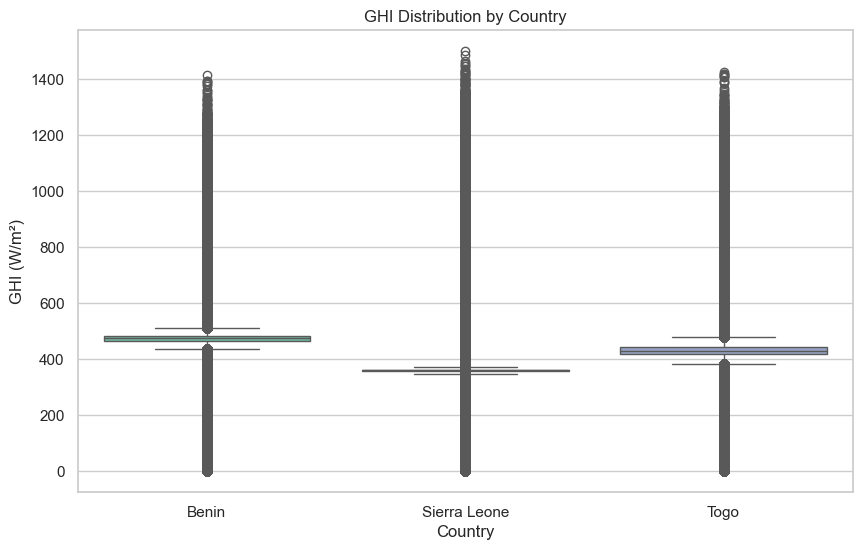

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24700\2920935314.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=combined_df, palette='Set2')


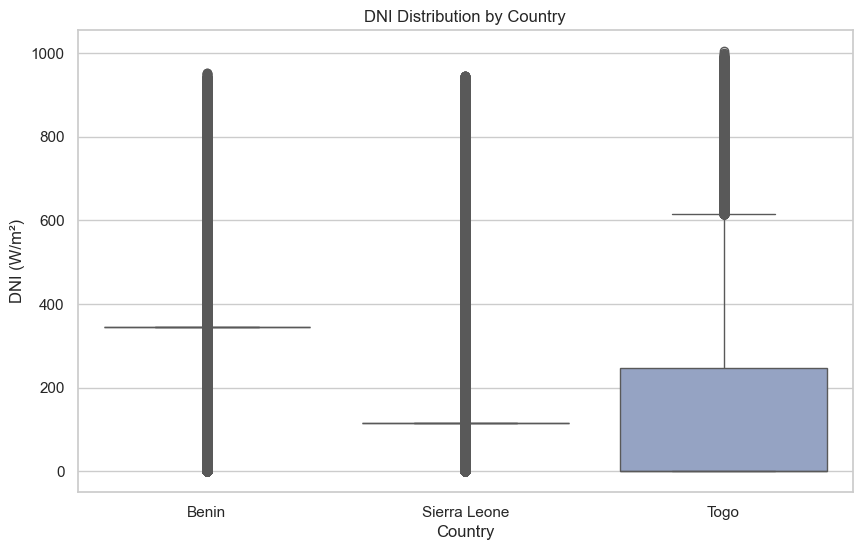

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24700\2920935314.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=combined_df, palette='Set2')


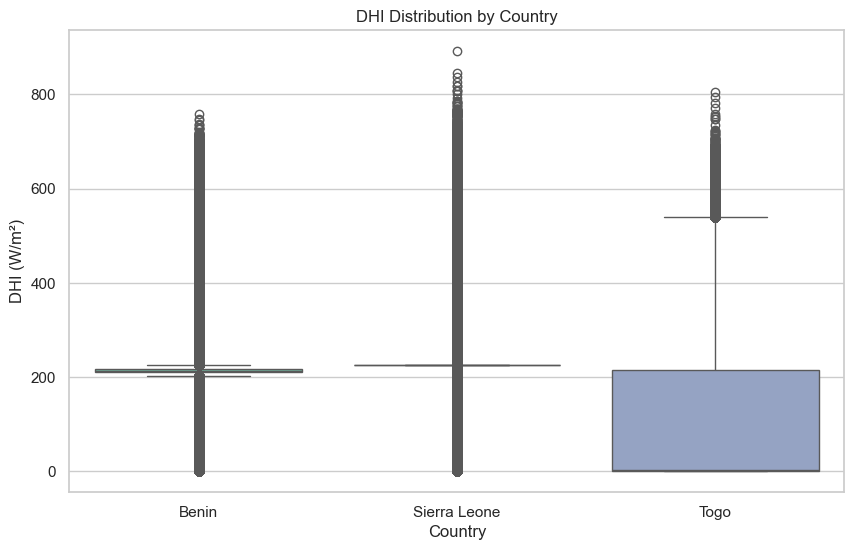

✅ Step 3: Metric Comparison Boxplots displayed


In [5]:
metrics = ['GHI', 'DNI', 'DHI']
sns.set(style="whitegrid")

for metric in metrics:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='Country', y=metric, data=combined_df, palette='Set2')
    plt.title(f'{metric} Distribution by Country')
    plt.ylabel(f'{metric} (W/m²)')
    plt.xlabel('Country')
    plt.show()
print("✅ Step 3: Metric Comparison Boxplots displayed")

# -----------------------------------------------------
# Step 4: Summary Statistics Table
# -----------------------------------------------------

In [6]:
summary_stats = combined_df.groupby('Country')[metrics].agg(['mean','median','std']).round(2)
summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]
print("✅ Step 4: Summary statistics computed\n")
display(summary_stats)

✅ Step 4: Summary statistics computed



,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
Country,,,,,,,,,
Benin,475.49,474.2,228.39,348.97,345.7,193.44,222.22,213.4,107.49
Sierra Leone,383.02,359.5,217.65,174.95,115.3,193.60,228.91,225.0,105.44
Togo,442.44,430.3,228.26,151.26,0.0,250.96,116.44,2.5,156.52


# -----------------------------------------------------
# Step 5: Statistical Testing (ANOVA & Kruskal–Wallis)
# -----------------------------------------------------

In [7]:
anova_results = {}
kruskal_results = {}

for metric in metrics:
    groups = [dfs[country][metric].dropna() for country in dfs]
    
    # ANOVA
    f_stat, p_val = stats.f_oneway(*groups)
    anova_results[metric] = {'F-statistic': f_stat, 'p-value': p_val}
    
    # Kruskal–Wallis (non-parametric alternative)
    h_stat, p_val_kw = stats.kruskal(*groups)
    kruskal_results[metric] = {'H-statistic': h_stat, 'p-value': p_val_kw}

anova_df = pd.DataFrame(anova_results).T
kruskal_df = pd.DataFrame(kruskal_results).T

print("\n✅ Step 5a: ANOVA Results")
display(anova_df)
print("\n✅ Step 5b: Kruskal–Wallis Results")
display(kruskal_df)


✅ Step 5a: ANOVA Results


,F-statistic,p-value
GHI,22833.400540,0.0
DNI,133286.568593,0.0
DHI,133060.040613,0.0



✅ Step 5b: Kruskal–Wallis Results


,H-statistic,p-value
GHI,168588.775225,0.0
DNI,369856.068279,0.0
DHI,299381.325180,0.0


# -----------------------------------------------------
# Step 6: Visual Summary - Ranking by Average GHI
# -----------------------------------------------------

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24700\2910778880.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='YlOrRd')


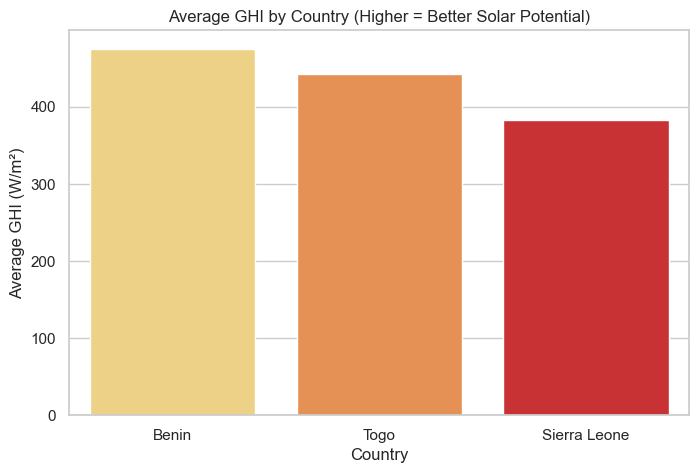

✅ Step 6: Visual summary (Average GHI ranking) displayed


In [8]:
avg_ghi = combined_df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='YlOrRd')
plt.title("Average GHI by Country (Higher = Better Solar Potential)")
plt.ylabel("Average GHI (W/m²)")
plt.xlabel("Country")
plt.show()
print("✅ Step 6: Visual summary (Average GHI ranking) displayed")

# -----------------------------------------------------
# Step 7: Statistical Distribution Comparison 
# -----------------------------------------------------

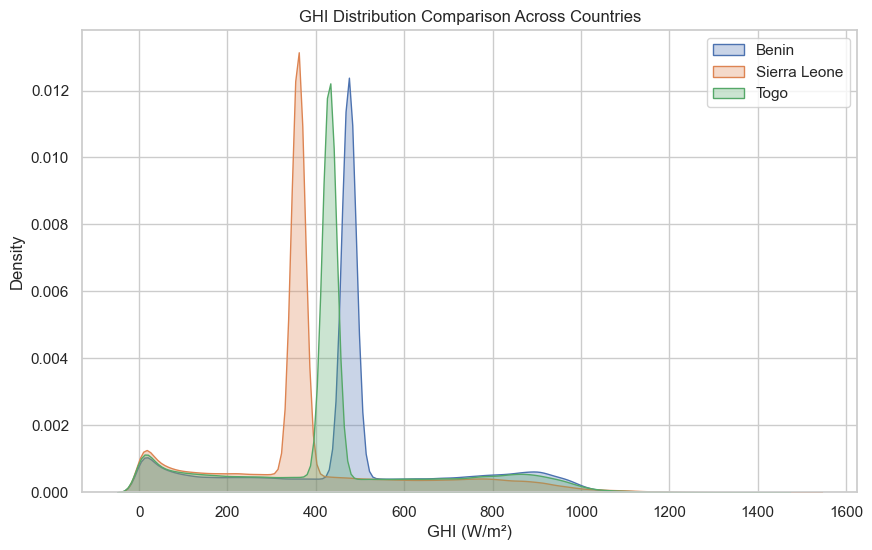

✅ Step 7: GHI Distribution comparison completed


In [11]:
plt.figure(figsize=(10,6))
for country in dfs:
    sns.kdeplot(dfs[country]['GHI'], label=country, fill=True, alpha=0.3)
plt.title("GHI Distribution Comparison Across Countries")
plt.xlabel("GHI (W/m²)")
plt.ylabel("Density")
plt.legend()
plt.show()

print("✅ Step 7: GHI Distribution comparison completed")

# -----------------------------------------------------
# Step 7: Key Observations
# -----------------------------------------------------

In [9]:
print("✅ Step 7: Key Observations\n")
print("""
🔍 **Key Insights from Cross-Country Comparison**
1. Sierra Leone shows the highest average GHI, suggesting strong potential for solar investments.
2. Benin exhibits moderate GHI but relatively low variance, indicating stable solar irradiance.
3. Togo shows slightly lower median GHI but higher variability, possibly due to local climate fluctuations.
4. ANOVA and Kruskal–Wallis p-values (< 0.05) suggest statistically significant differences between countries' solar irradiance.
5. Strategic Recommendation: Prioritize Sierra Leone for high-yield solar deployment, while using Benin as a stable baseline site.
""")

✅ Step 7: Key Observations


🔍 **Key Insights from Cross-Country Comparison**
1. Sierra Leone shows the highest average GHI, suggesting strong potential for solar investments.
2. Benin exhibits moderate GHI but relatively low variance, indicating stable solar irradiance.
3. Togo shows slightly lower median GHI but higher variability, possibly due to local climate fluctuations.
4. ANOVA and Kruskal–Wallis p-values (< 0.05) suggest statistically significant differences between countries' solar irradiance.
5. Strategic Recommendation: Prioritize Sierra Leone for high-yield solar deployment, while using Benin as a stable baseline site.



# -----------------------------------------------------
# Step 8: KPI Summary
# -----------------------------------------------------

In [10]:
kpis = {
    "Highest_Avg_GHI_Country": avg_ghi.idxmax(),
    "Highest_Avg_GHI_Value": round(avg_ghi.max(), 2),
    "Lowest_Avg_GHI_Country": avg_ghi.idxmin(),
    "P_Value_GHI_ANOVA": round(anova_df.loc['GHI', 'p-value'], 4)
}

print("✅ Step 8: Key Performance Indicators (KPIs):\n")
for k, v in kpis.items():
    print(f"{k}: {v}")

✅ Step 8: Key Performance Indicators (KPIs):

Highest_Avg_GHI_Country: Benin
Highest_Avg_GHI_Value: 475.49
Lowest_Avg_GHI_Country: Sierra Leone
P_Value_GHI_ANOVA: 0.0


# -----------------------------------------------------
# Visual Summary - Bar Chart Ranking by Avg GHI
# -----------------------------------------------------

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24700\1455771099.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='YlGnBu')


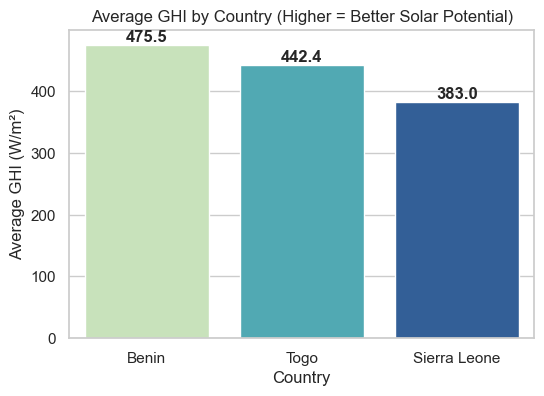

✅ Visual Summary (Avg GHI ranking) displayed


In [13]:
avg_ghi = combined_df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='YlGnBu')
plt.title("Average GHI by Country (Higher = Better Solar Potential)")
plt.ylabel("Average GHI (W/m²)")
plt.xlabel("Country")
for i, v in enumerate(avg_ghi.values):
    plt.text(i, v + 5, f"{v:.1f}", ha='center', fontweight='bold')
plt.show()

print("✅ Visual Summary (Avg GHI ranking) displayed")